# Main

* Define shape parameters
* Generate surface grids
* Randomly generate particle shapes
* Export STL files and PNG snapshots

## Load packages and functions

In [5]:
import numpy as np
import scipy.io as sio
from funcs import *
from SHPSG import *

## Define shape parameters

In [6]:
# particle form: elongation index and flatness index
Ei,Fi = 1,1
# particle roundness: larger D2_8 --> lower roundness
D2_8 = [0.1, 0.2, 0.3]
# particle roughness: larger D9_15 --> higher roughness
D9_15 = [0.0]

## Generate surface grids

In [7]:
level = 2 # face number: 20 @ level-0; 80 @ level-1; 320 @ level-2

# create isosahedron surface
vertices, faces = icosahedron()
for i in range(level): 
    # subdivide surface
    vertices, faces = subdivsurf(faces,vertices)
    # remove duplicate vertices
    vertices, faces = cleanmesh(faces,vertices)
# convert from Cartesian to spherical coordinates
sph_cor = car2sph(vertices)

## Generate and export particle shapes

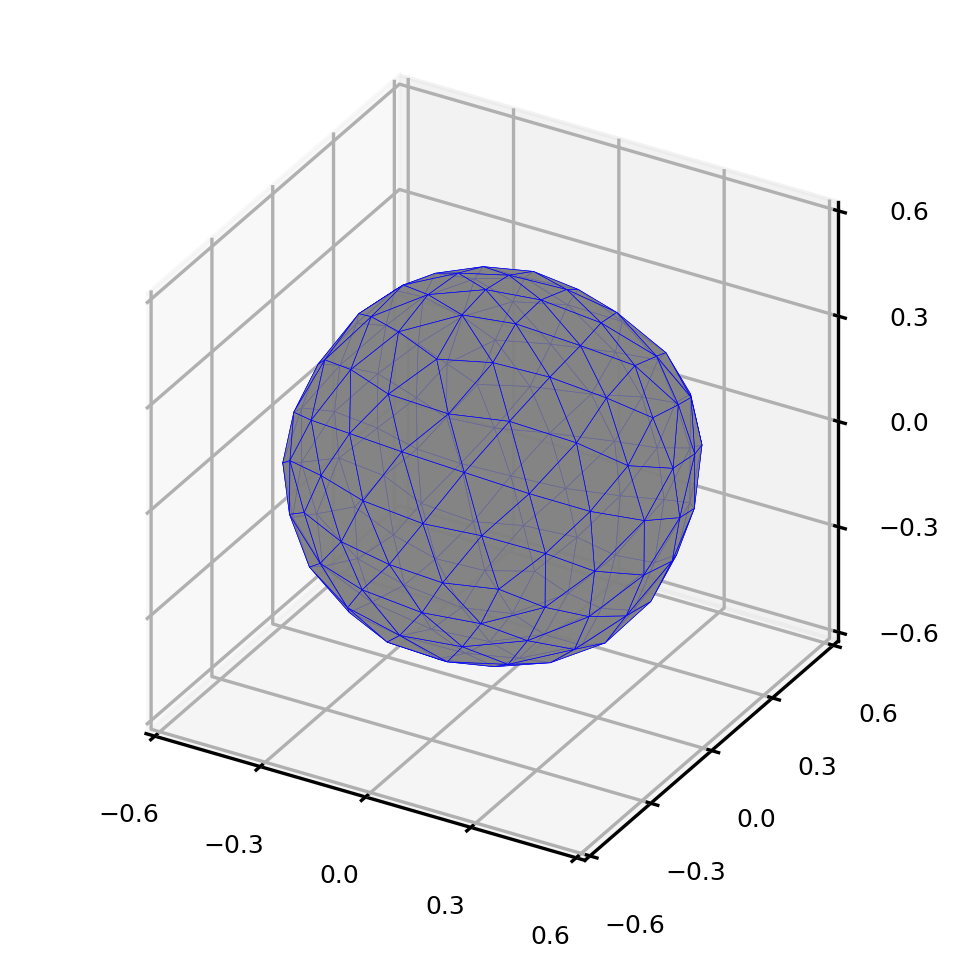

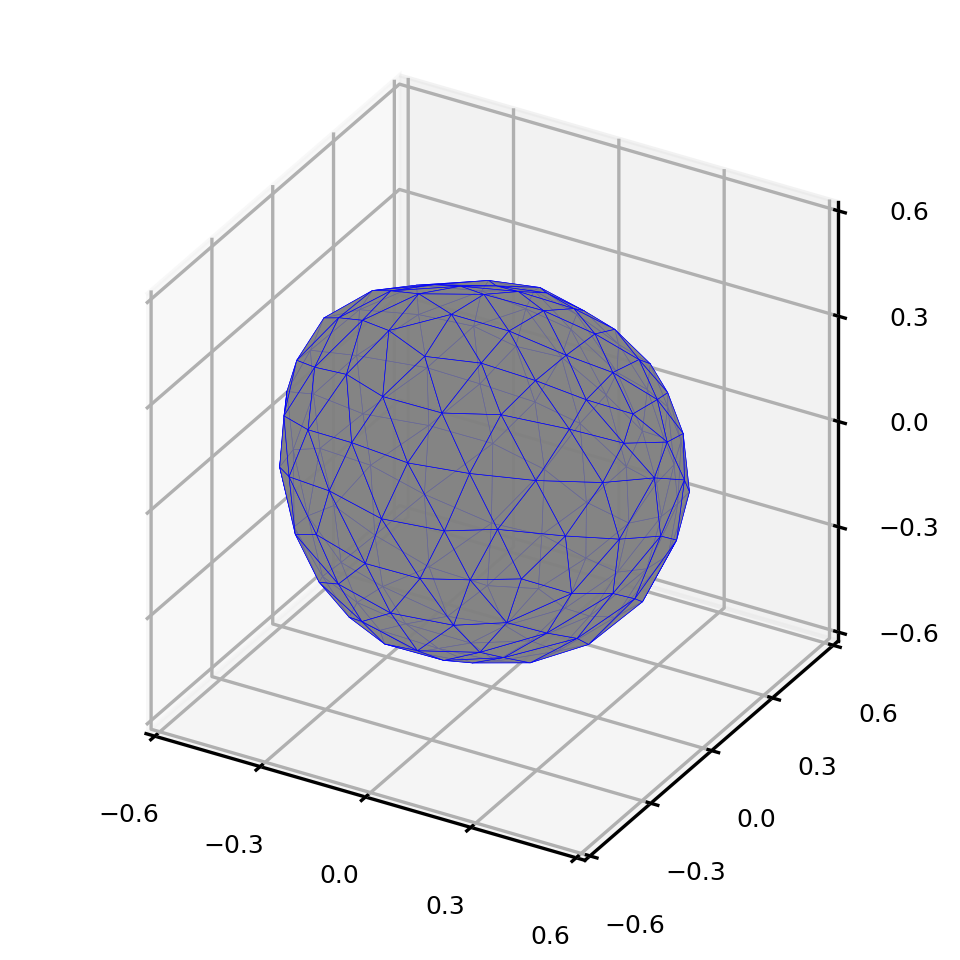

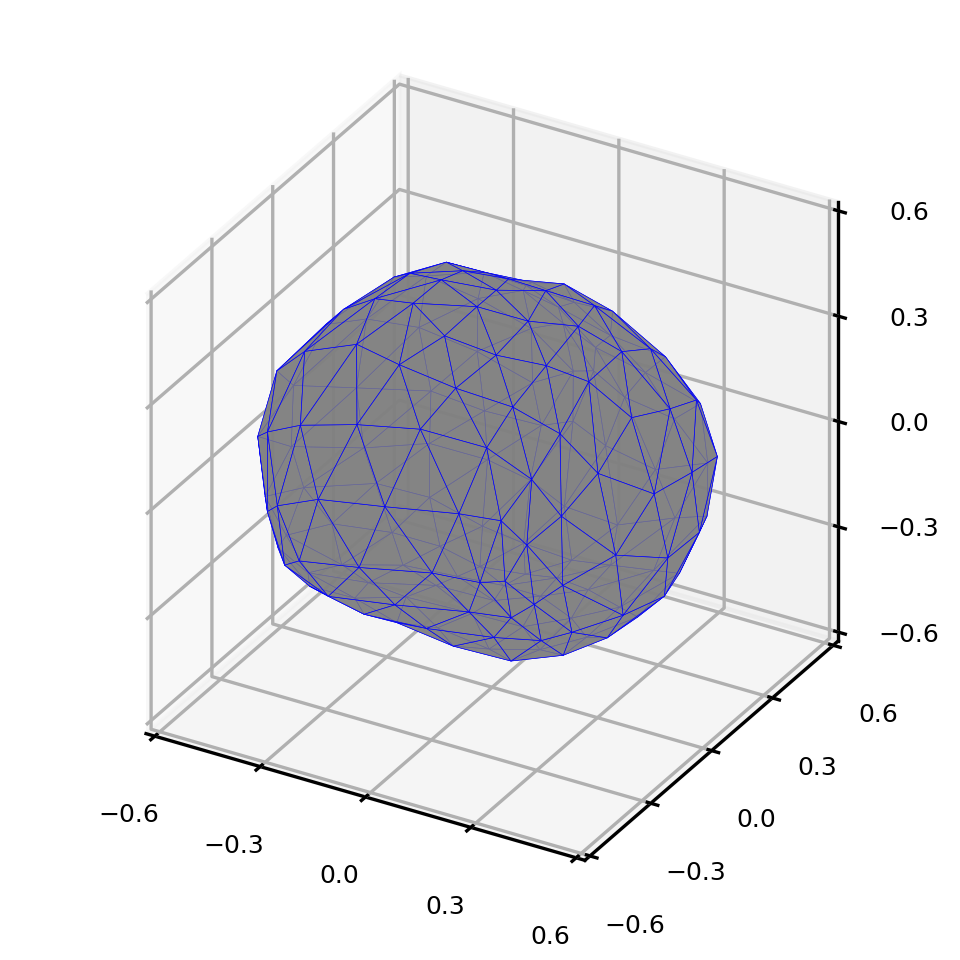

In [8]:
npar = 1 # particle number for each parameter group

for j in range(len(D2_8)):
    for k in range(len(D9_15)):
        for i in range(npar):
            # random generate SH coefficients
            coeff = SHPSG(Ei,Fi,D2_8[j],D9_15[k])
            # convert to spherical coordinates
            stlpath = './data/D2_8_'+str('%.2f' % D2_8[j])+'_par'+str(i)+'.stl'
            figpath = './data/D2_8_'+str('%.2f' % D2_8[j])+'_par'+str(i)+'.png'
            # export to stl files
            sh2stl(coeff, sph_cor, vertices, faces,stlpath)
            # plot particle and save snapshort
            plotstl(stlpath,figpath)